In [1]:
from src.graphics import draw_graph, draw_distribution
from src.processing import read_tabular, apply_function_on_results, group_by_day, cumulative_sum, cumulative_ratio
from src.calculations import points, difference, accuracy, n_diff

In [2]:
df = read_tabular('results.csv')
print(df)

    Day Result    M    H    D    L     A    I    B     U    F    E
0     1    1-0  2-2  2-2  0-2  0-2   1-3  1-3  2-1   1-3  1-2  1-3
1     1    1-0  4-1  2-2  0-1  2-1   4-1  2-0  3-0   4-0  3-0  2-0
2     2    0-0  1-5  1-2  0-3  1-3   0-4  2-2  1-1   0-6  2-0  1-3
3     2    0-2  1-4  1-3  0-1  0-8   0-6  0-3  1-2   1-5  0-2  0-4
4     2    3-0  5-0  3-0  1-1  3-1   5-1  3-1  3-0   4-0  5-0  4-0
5     3    3-0  6-0  4-0  4-0  5-0  10-0  4-1  4-0   9-0  4-0  4-0
6     3    0-5  1-4  0-2  0-3  0-3   0-4  1-3  0-2  0-10  1-1  1-3
7     3    1-0  3-0  3-1  1-0  4-0   9-0  4-0  4-0   7-0  3-0  4-0
8     3    1-0  2-2  1-1  3-0  3-1   5-1  3-1  2-0   1-1  2-2  3-1
9     4    2-1  3-0  2-1  2-1  3-1   4-0  3-1  3-1   3-0  2-0  3-0
10    4    1-0  4-2  2-3  1-1  2-2   3-1  3-2  2-1   2-2  1-1  3-1
11    4    0-0  4-0  3-1  3-0  3-0   4-1  2-1  4-0   6-0  4-1  3-0
12    5    1-0  3-3  0-2  0-0  3-1   3-1  2-2  2-1   2-3  2-2  2-0
13    5    6-0  5-0  4-0  2-0  4-1   8-1  4-1  3-0  11-0  5-0 

In [3]:
df_scores = apply_function_on_results(df, points)
# Scores per day
df_scores_day = group_by_day(df_scores, 'sum')
# Total score over time
df_total_score = cumulative_sum(df_scores_day)

In [4]:
df_acc = apply_function_on_results(df, accuracy)
# Mean accuracy per day
df_acc_day = group_by_day(df_acc, 'mean')
# Mean accuracy over time
df_mean_acc = cumulative_ratio(df_acc_day)

In [5]:
df_goal_diff = apply_function_on_results(df, difference)
# Mean goal difference per day
df_goal_diff_day = group_by_day(df_goal_diff, 'sum')
# Goal difference over time
df_goal_diff = cumulative_sum(df_goal_diff_day)

In [6]:
# Total number of correct results, if they differered with 'n' (0-3)
df_n_diff = df.copy()[0:0].drop(['Day','Result'],axis=1)
for n in range(0,4):
  df_n_diff.loc[n] = cumulative_sum(group_by_day(apply_function_on_results(df, lambda x, y : n_diff(n,x,y)),'sum')).iloc[-1]

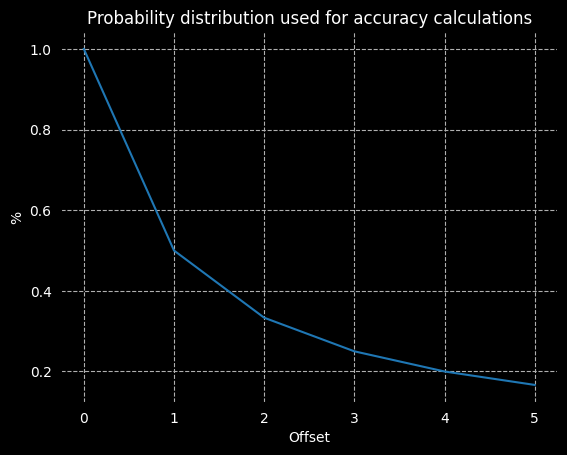

In [7]:
draw_distribution()

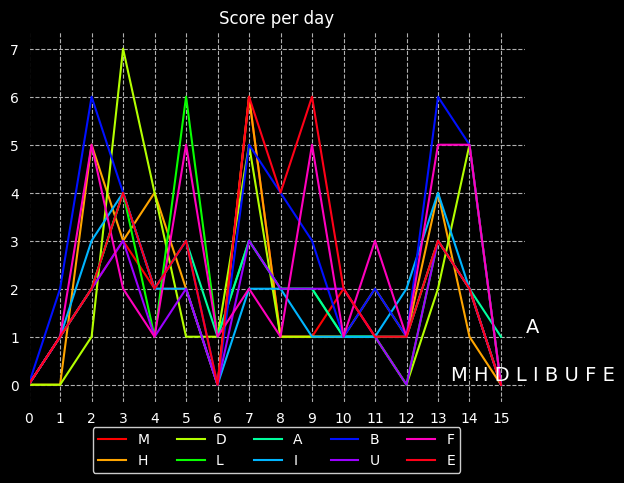

In [15]:
draw_graph(df_scores_day, 'Score per day')

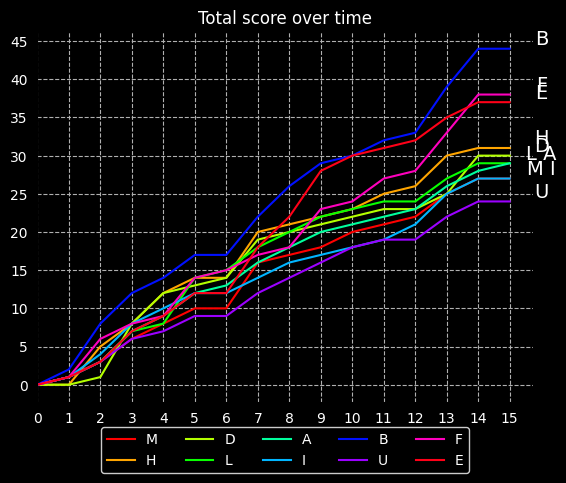

In [9]:
draw_graph(df_total_score, 'Total score over time')

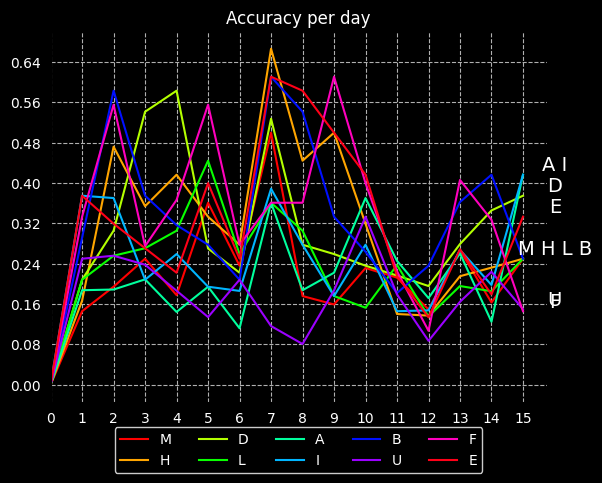

In [10]:
draw_graph(df_acc_day, 'Accuracy per day')

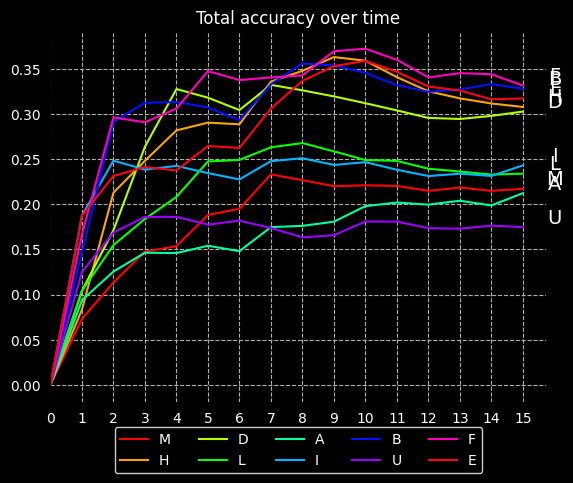

In [11]:
draw_graph(df_mean_acc, 'Total accuracy over time')

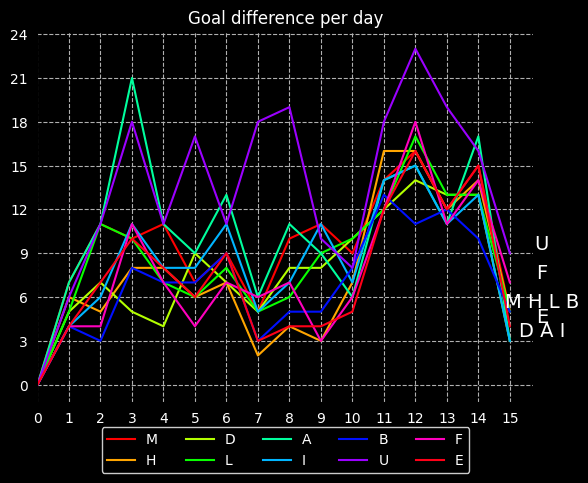

In [12]:
draw_graph(df_goal_diff_day, 'Goal difference per day')

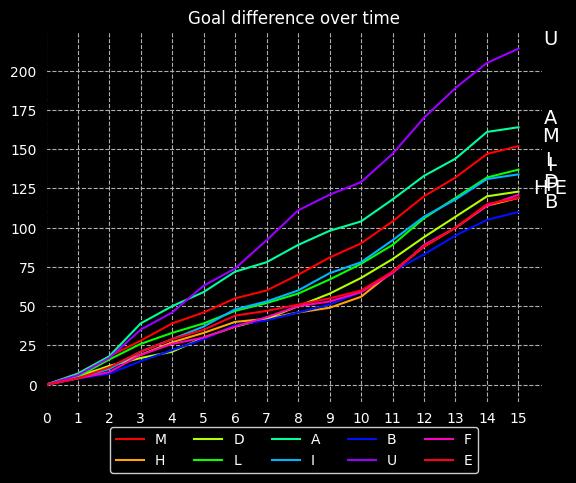

In [13]:
draw_graph(df_goal_diff, 'Goal difference over time')

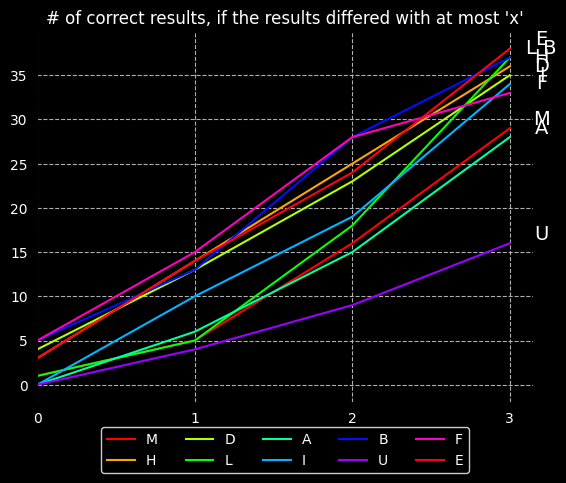

In [14]:
draw_graph(df_n_diff, "# of correct results, if the results differed with at most 'x'")